In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

data_path = r"C:\Users\hp\Desktop\DataMinig\Data"

In [2]:
orders = pd.read_csv(r"C:\Users\hp\Desktop\DataMinig\Data\olist_order_items_dataset.csv")

products = pd.read_csv(r"C:\Users\hp\Desktop\DataMinig\Data\olist_products_dataset.csv")

translations = pd.read_csv(r"C:\Users\hp\Desktop\DataMinig\Data\product_category_name_translation.csv")

In [3]:
orders.head()

,order_id,order_item_id,product_id,price
0,b8bfa12431142333a0c84802f9529d87,1,765a8070ece0f1383d0f5faf913dfb9b,81.0
1,b8bfa12431142333a0c84802f9529d87,2,a41e356c76fab66334f36de622ecbd3a,99.3
2,b8bfa12431142333a0c84802f9529d87,3,765a8070ece0f1383d0f5faf913dfb9b,81.0
3,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9
4,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.9


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   price          112650 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ MB


In [5]:
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0,20.0,17.0,13.0


In [6]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32341 non-null  object 
 2   product_weight_g       32949 non-null  float64
 3   product_length_cm      32949 non-null  float64
 4   product_height_cm      32949 non-null  float64
 5   product_width_cm       32949 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB


In [7]:
translations.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [8]:
products = products.merge(translations, on='product_category_name', how="left")

products['product_category_name_english']

0                          perfume
1                              art
2                   sports_leisure
3                             baby
4                       housewares
                   ...            
32946              furniture_decor
32947    construction_tools_lights
32948               bed_bath_table
32949        computers_accessories
32950               bed_bath_table
Name: product_category_name_english, Length: 32951, dtype: object

In [9]:
orders = orders.merge(products[['product_id','product_category_name_english']], on='product_id', how='left')

In [10]:
orders.head()

,order_id,order_item_id,product_id,price,product_category_name_english
0,b8bfa12431142333a0c84802f9529d87,1,765a8070ece0f1383d0f5faf913dfb9b,81.0,sports_leisure
1,b8bfa12431142333a0c84802f9529d87,2,a41e356c76fab66334f36de622ecbd3a,99.3,NaN
2,b8bfa12431142333a0c84802f9529d87,3,765a8070ece0f1383d0f5faf913dfb9b,81.0,sports_leisure
3,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff
4,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.9,pet_shop


In [11]:
orders.dropna(inplace=True, subset=['product_category_name_english'])

In [12]:
len(orders['product_id'].unique())

32328

In [13]:
len(orders['product_category_name_english'].unique())

71

In [14]:
example1 = orders[orders['order_id'] == 'fe64170e936bc5f6a6a41def260984b9']['product_category_name_english']

example1

111984     bed_bath_table
111985    furniture_decor
Name: product_category_name_english, dtype: object

In [15]:
example2 = orders[orders['order_id'] == 'fffb9224b6fc7c43ebb0904318b10b5f']['product_category_name_english']

example2

112640    watches_gifts
112641    watches_gifts
112642    watches_gifts
112643    watches_gifts
Name: product_category_name_english, dtype: object

In [16]:
transactions = orders.groupby("order_id").product_category_name_english.unique()

transactions.head()

order_id
00010242fe8c5a6d1ba2dd792cb16214         [cool_stuff]
00018f77f2f0320c557190d7a144bdd3           [pet_shop]
000229ec398224ef6ca0657da4fc703e    [furniture_decor]
00024acbcdf0a6daa1e931b038114c75            [perfume]
00042b26cf59d7ce69dfabb4e55b4fd9       [garden_tools]
Name: product_category_name_english, dtype: object

<Axes: xlabel='product_category_name_english'>

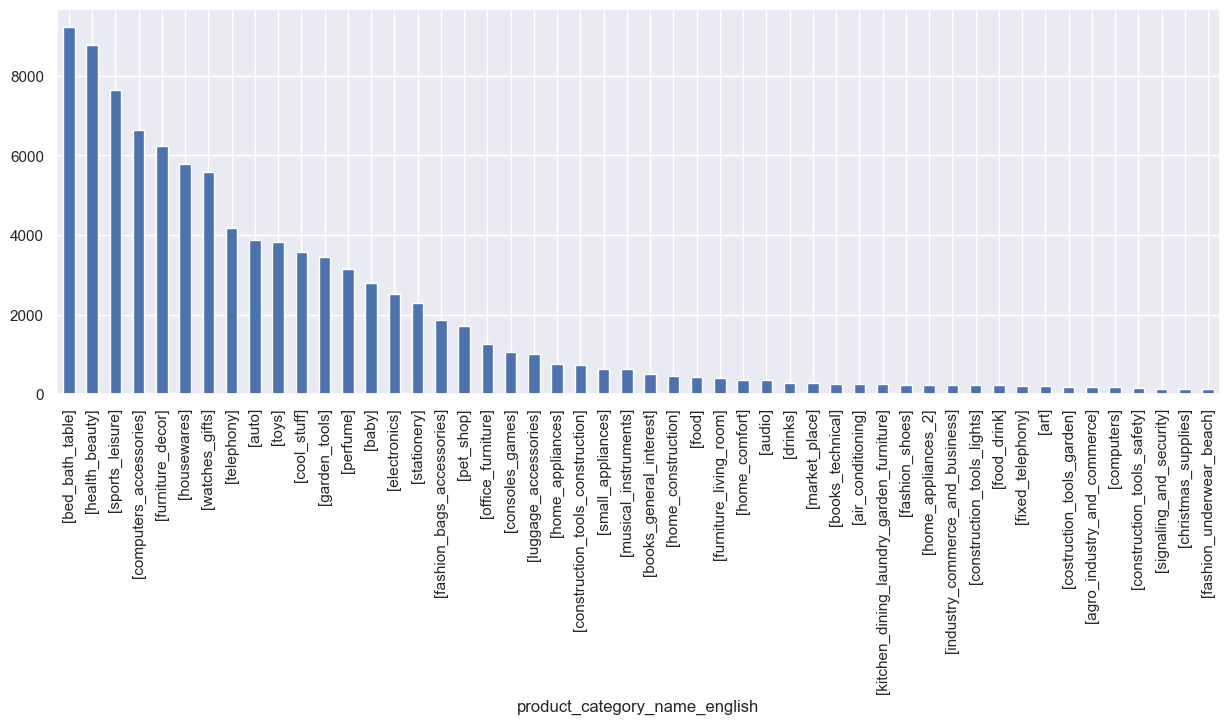

In [17]:
transactions.value_counts()[:50].plot(kind='bar', figsize=(15,5))

In [18]:
transactions = transactions.tolist()

In [19]:
len(transactions)

97256

In [20]:
counts = [len(transaction) for transaction in transactions]

In [21]:
np.median(counts)

1.0

In [22]:
np.max(counts)

3

In [23]:
from mlxtend.preprocessing import TransactionEncoder

encoder = TransactionEncoder()

encoder.fit(transactions)

onehot = encoder.transform(transactions)

onehot = pd.DataFrame(onehot, columns = encoder.columns_)

In [24]:
onehot.head()

,agro_industry_and_commerce,air_conditioning,art,arts_and_crafts,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
onehot.mean(axis=0)

agro_industry_and_commerce    0.001871
air_conditioning              0.002601
art                           0.002077
arts_and_crafts               0.000236
audio                         0.003599
                                ...   
stationery                    0.023762
tablets_printing_image        0.000812
telephony                     0.043175
toys                          0.039956
watches_gifts                 0.057827
Length: 71, dtype: float64

In [26]:
onehot.sum(axis=1).value_counts()

1    96530
2      711
3       15
Name: count, dtype: int64

In [27]:
onehot['sports_leisure_health_beauty'] = onehot['sports_leisure'] & onehot['health_beauty']

onehot['sports_leisure_health_beauty'].mean(axis = 0)

0.00014394998766142962

In [28]:
onehot['books'] = onehot['books_imported'] | onehot['books_technical']

onehot[['books','books_imported','books_technical']].mean(axis=0)

books              0.003218
books_imported     0.000545
books_technical    0.002673
dtype: float64

In [29]:
joint_support = (onehot['sports_leisure'] & onehot['health_beauty']).mean()

joint_support / onehot['sports_leisure'].mean()

0.0018134715025906734

In [30]:
joint_support / onehot['sports_leisure'].mean()

0.0018134715025906734

In [31]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(onehot, min_support = 0.01)

frequent_itemsets

,support,itemsets
0,0.040070,(5)
1,0.029664,(6)
2,0.096827,(7)
3,0.068777,(15)
4,0.010920,(16)
5,0.037345,(20)
6,0.026219,(27)
7,0.019166,(28)
8,0.066310,(40)
9,0.036173,(43)


In [32]:
frequent_itemsets = apriori(onehot, min_support = 0.001, use_colnames = True)

frequent_itemsets

,support,itemsets
0,0.001871,(agro_industry_and_commerce)
1,0.002601,(air_conditioning)
2,0.002077,(art)
3,0.003599,(audio)
4,0.040070,(auto)
5,0.029664,(baby)
6,0.096827,(bed_bath_table)
7,0.005264,(books_general_interest)
8,0.002673,(books_technical)
9,0.001316,(christmas_supplies)


In [33]:
frequent_itemsets = apriori(onehot, min_support = 0.00005, max_len = 2, use_colnames = True)

In [34]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.0001)

rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(baby),(bed_bath_table),0.029664,0.096827,0.000175,0.005893,0.060856,-0.002697,0.908527,-0.940842
1,(bed_bath_table),(baby),0.096827,0.029664,0.000175,0.001805,0.060856,-0.002697,0.972091,-0.944710
2,(baby),(cool_stuff),0.029664,0.037345,0.000206,0.006932,0.185633,-0.000902,0.969375,-0.818876
3,(cool_stuff),(baby),0.037345,0.029664,0.000206,0.005507,0.185633,-0.000902,0.975709,-0.820052
4,(baby),(furniture_decor),0.029664,0.066310,0.000123,0.004159,0.062728,-0.001844,0.937590,-0.939020


In [35]:
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.01)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(art),(furniture_decor),0.002077,0.066310,0.000051,0.024752,0.373287,-0.000086,0.957388,-0.627199
1,(audio),(watches_gifts),0.003599,0.057827,0.000062,0.017143,0.296452,-0.000146,0.958606,-0.704299
2,(furniture_decor),(bed_bath_table),0.066310,0.096827,0.000720,0.010854,0.112101,-0.005701,0.913084,-0.894549
3,(home_comfort),(bed_bath_table),0.004082,0.096827,0.000442,0.108312,1.118618,0.000047,1.012881,0.106474
4,(books),(books_imported),0.003218,0.000545,0.000545,0.169329,310.722045,0.000543,1.203190,1.000000
5,(books_imported),(books),0.000545,0.003218,0.000545,1.000000,310.722045,0.000543,inf,0.997325
6,(books),(books_technical),0.003218,0.002673,0.002673,0.830671,310.722045,0.002665,5.889872,1.000000
7,(books_technical),(books),0.002673,0.003218,0.002673,1.000000,310.722045,0.002665,inf,0.999454
8,(construction_tools_lights),(furniture_decor),0.002509,0.066310,0.000113,0.045082,0.679872,-0.000053,0.977770,-0.320675
9,(furniture_living_room),(furniture_decor),0.004339,0.066310,0.000072,0.016588,0.250155,-0.000216,0.949439,-0.750660


In [36]:
rules = rules[rules['consequent support'] > 0.095]

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(furniture_decor),(bed_bath_table),0.066310,0.096827,0.000720,0.010854,0.112101,-0.005701,0.913084,-0.894549
3,(home_comfort),(bed_bath_table),0.004082,0.096827,0.000442,0.108312,1.118618,0.000047,1.012881,0.106474


<Axes: xlabel='leverage', ylabel='confidence'>

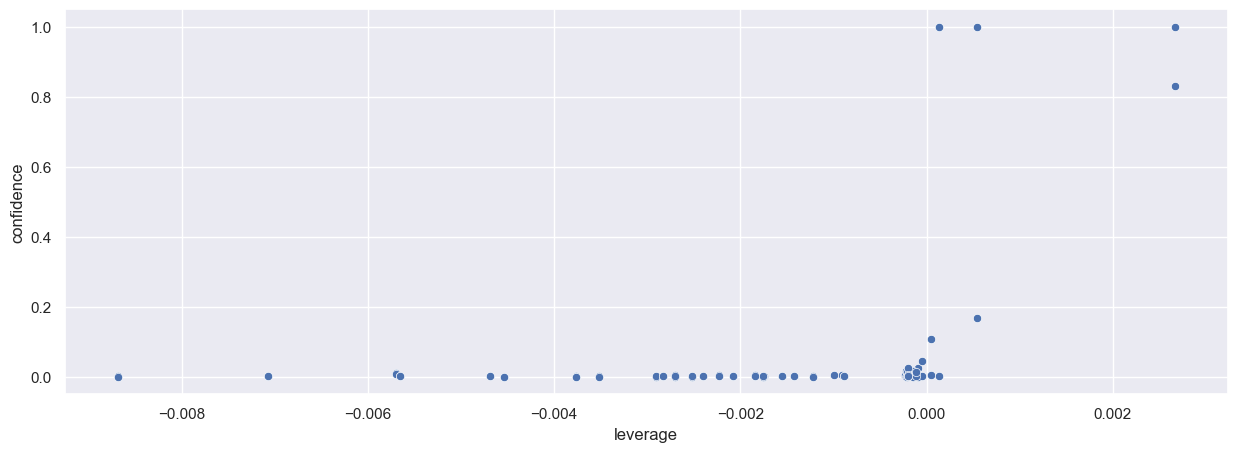

In [37]:
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.000001)

plt.figure(figsize=(15,5))
sns.scatterplot(x="leverage", y="confidence", data=rules)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Set seaborn styling
sns.set()


orders = pd.read_csv(r"C:\Users\hp\Desktop\DataMinig\Data\olist_order_items_dataset.csv")
products = pd.read_csv(r"C:\Users\hp\Desktop\DataMinig\Data\olist_products_dataset.csv")
translations = pd.read_csv(r"C:\Users\hp\Desktop\DataMinig\Data\product_category_name_translation.csv")

In [2]:
products = products.merge(translations, on='product_category_name', how="left")

In [3]:
orders = orders.merge(products[['product_id','product_category_name_english']], on='product_id', how='left')

In [4]:
orders.dropna(inplace=True, subset=['product_category_name_english'])

In [5]:
transactions = orders.groupby("order_id").product_category_name_english.unique()

In [6]:
transactions = transactions.tolist()

In [9]:
encoder = TransactionEncoder()
encoder.fit(transactions)

TransactionEncoder()

In [10]:
onehot = encoder.transform(transactions)
onehot = pd.DataFrame(onehot, columns=encoder.columns_)

In [11]:
frequent_itemsets = apriori(onehot, min_support=0.00005, max_len=2, use_colnames=True)

In [12]:
rules = association_rules(frequent_itemsets, metric='support', min_threshold=0.0001)

In [14]:
def rule_based_recommender(input_product_category, rules_df, min_confidence=0.5):

    filtered_rules = rules_df[rules_df['antecedents'].apply(lambda x: input_product_category in x)]
    
    filtered_rules = filtered_rules[filtered_rules['confidence'] >= min_confidence]
    
    filtered_rules = filtered_rules.sort_values(by='lift', ascending=False)

    recommended_categories = filtered_rules['consequents'].explode().unique()
    
    return recommended_categories


In [15]:
input_category = 'sports_leisure'
recommended_categories = rule_based_recommender(input_category, rules)
print("Recommended Product Categories for", input_category, ":", recommended_categories)

Recommended Product Categories for sports_leisure : []
